- random forest use bootstraping and random feature selection
- random forest regressor use mean at aggregations step (combining all decision trees outcomes)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [29]:
x = df.iloc[ : ,:-1]
y = df.iloc[ : ,-1:]

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100)
model.fit(x,y)

model.predict([[1,1,1,3]])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.8])

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
predictions = model.predict(x_test)
predictions

array([1.  , 0.  , 2.  , 2.  , 1.  , 1.79, 0.  , 1.73, 1.  , 1.06, 1.  ,
       2.  , 1.  , 1.  , 0.  , 1.01, 1.  , 2.  , 1.  , 1.  , 0.  , 2.  ,
       0.  , 2.  , 1.19, 2.  , 0.  , 0.  , 1.87, 0.  ])

In [33]:
score = model.score(x_test, y_test)
print("Tha score is: ",score)

Tha score is:  0.9902779850746268


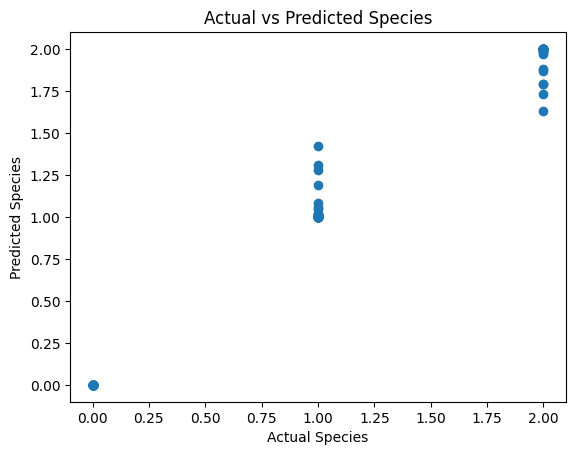

In [41]:
y_predict = model.predict(x)
plt.scatter(y, y_predict)
plt.xlabel('Actual Species')
plt.ylabel('Predicted Species')
plt.title('Actual vs Predicted Species')
plt.show()
